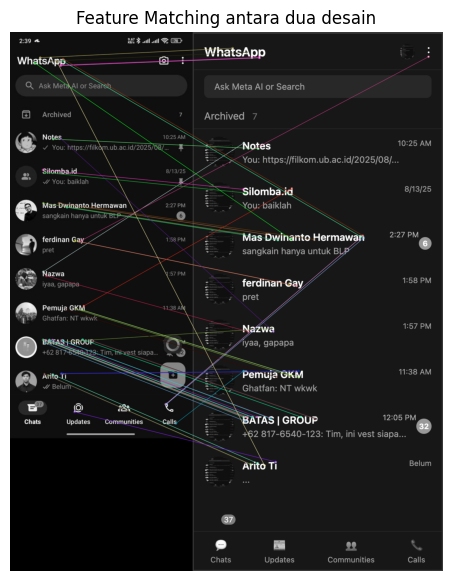

Skor Kemiripan (0-1): 0.87


In [ ]:
import cv2
import matplotlib.pyplot as plt

# --- 1. Baca gambar ---
img1 = cv2.imread("desain1.jpeg", cv2.IMREAD_GRAYSCALE)  # Gambar pertama
img2 = cv2.imread("desain2.png", cv2.IMREAD_GRAYSCALE)  # Gambar kedua

# --- 2. Deteksi keypoints & descriptors pakai ORB ---
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# --- 3. Matching dengan Brute Force (Hamming distance) ---
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Urutkan hasil match biar yang paling mirip dulu
matches = sorted(matches, key=lambda x: x.distance)

# --- 4. Visualisasikan 50 match terbaik ---
result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(15, 7))
plt.imshow(result)
plt.title("Feature Matching antara dua desain")
plt.axis("off")
plt.show()

# --- 5. Skor kemiripan sederhana ---
similarity_score = 1 - (sum([m.distance for m in matches]) / (len(matches) * 256))
print(f"Skor Kemiripan (0-1): {similarity_score:.2f}")


Skor SSIM (0-1): 0.5961


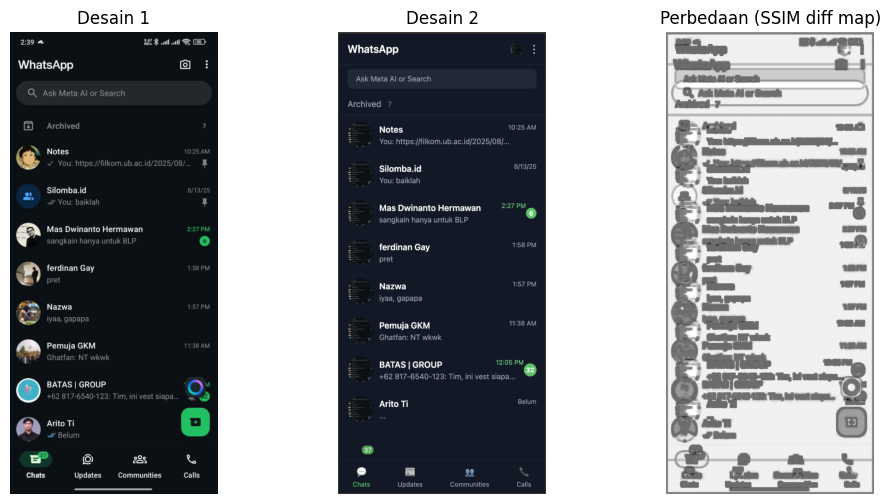

In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# --- 1. Baca gambar ---
img1 = cv2.imread("desain1.jpeg")
img2 = cv2.imread("desain2.png")

# Samakan ukuran biar fair
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# --- 2. Ubah ke grayscale ---
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# --- 3. Hitung SSIM ---
score, diff = ssim(gray1, gray2, full=True)
print(f"Skor SSIM (0-1): {score:.4f}")

# --- 4. Visualisasi hasil perbedaan ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Desain 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Desain 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.title("Perbedaan (SSIM diff map)")
plt.axis("off")

plt.show()


Correlation Score: 0.0276
Chi-Square Score: 206.8953
Bhattacharyya Score: 0.8114


/tmp/ipython-input-573058322.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img1[:, :, i].ravel(), 256, [0, 256], color=col)
/tmp/ipython-input-573058322.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img2[:, :, i].ravel(), 256, [0, 256], color=col)


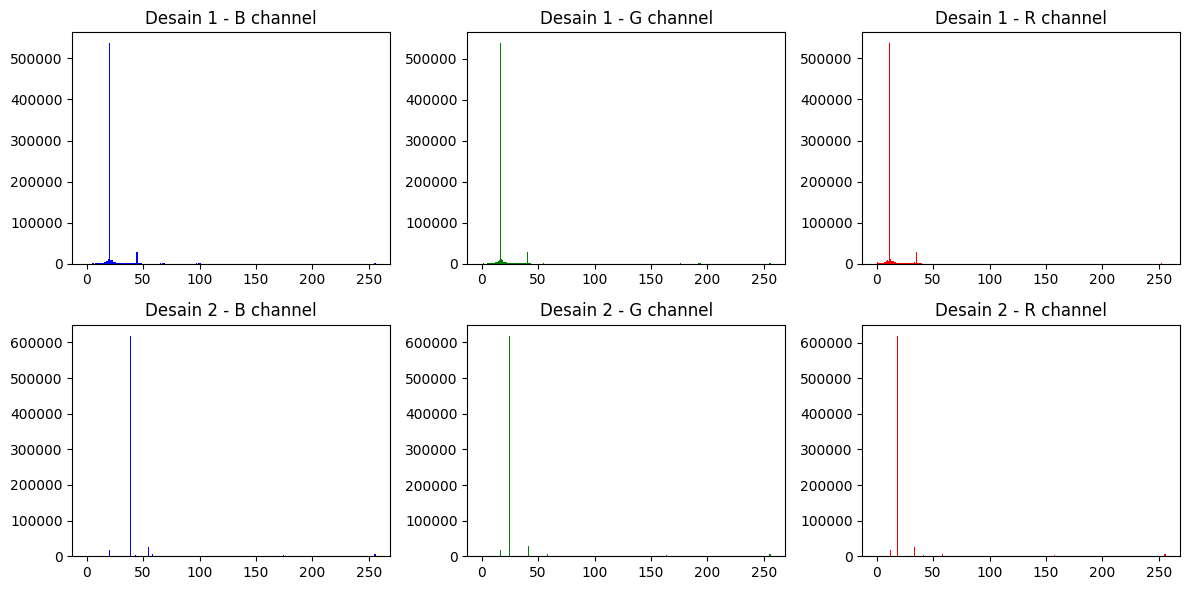

In [ ]:
import cv2
import matplotlib.pyplot as plt

# --- 1. Baca gambar ---
img1 = cv2.imread("desain1.jpeg")
img2 = cv2.imread("desain2.png")

# Samakan ukuran biar fair
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# --- 2. Hitung histogram warna (BGR channels) ---
hist1 = cv2.calcHist([img1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
hist2 = cv2.calcHist([img2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

# Normalisasi supaya skala sama
cv2.normalize(hist1, hist1)
cv2.normalize(hist2, hist2)

# --- 3. Bandingkan histogram ---
methods = {
    "Correlation": cv2.HISTCMP_CORREL,
    "Chi-Square": cv2.HISTCMP_CHISQR,
    "Bhattacharyya": cv2.HISTCMP_BHATTACHARYYA
}

for name, method in methods.items():
    score = cv2.compareHist(hist1, hist2, method)
    print(f"{name} Score: {score:.4f}")

# --- 4. Visualisasi histogram tiap channel ---
colors = ('b', 'g', 'r')
plt.figure(figsize=(12, 6))

for i, col in enumerate(colors):
    plt.subplot(2, 3, i+1)
    plt.hist(img1[:, :, i].ravel(), 256, [0, 256], color=col)
    plt.title(f"Desain 1 - {col.upper()} channel")

    plt.subplot(2, 3, i+4)
    plt.hist(img2[:, :, i].ravel(), 256, [0, 256], color=col)
    plt.title(f"Desain 2 - {col.upper()} channel")

plt.tight_layout()
plt.show()


In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image

# --- 1. Load model CLIP (cocok untuk teks & gambar) ---
model = SentenceTransformer("clip-ViT-B-32")

# --- 2. Load gambar ---
img1 = Image.open("desain1.jpeg")
img2 = Image.open("desain2.png")

# --- 3. Buat embedding ---
emb1 = model.encode(img1, convert_to_tensor=True)
emb2 = model.encode(img2, convert_to_tensor=True)

# --- 4. Hitung Cosine Similarity ---
similarity = util.cos_sim(emb1, emb2).item()
print(f"Cosine Similarity: {similarity:.4f}")
print(f"Persentase Kemiripan: {similarity*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Cosine Similarity: 0.7173
Persentase Kemiripan: 71.73%
